In [ ]:
# CALCULATING ACCURACIES USING BOTH MODELS FOR KIDNEY DISEASE PREDICTION

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'chronic_kidney_disease_full.xlsx' 
ckd_data = pd.read_excel(file_path)

# Replace '?' with NaN for missing values
ckd_data.replace('?', np.nan, inplace=True)

# Convert columns to appropriate data types
# Columns with less than 10 unique values are considered categorical
for col in ckd_data.columns:
    if ckd_data[col].nunique() < 10:
        ckd_data[col] = ckd_data[col].astype('category')
    else:
        ckd_data[col] = pd.to_numeric(ckd_data[col], errors='coerce')

# Separating features (X) and the target variable (y)
X = ckd_data.drop('class', axis=1)
y = ckd_data['class']

# Encoding categorical variables using Label Encoding
label_encoders = {}
for column in X.select_dtypes(include=['category']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column].astype(str))

# Impute missing values using the mean for each column
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Training the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Printing the accuracies
print(f'KNN Accuracy: {accuracy_knn * 100}%')
print(f'Naive Bayes Accuracy: {accuracy_nb * 100}%')


KNN Accuracy: 97.5%
Naive Bayes Accuracy: 92.5%


<ipython-input-18-3677d9cfebb7>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_updated = ckd_data_cleaned.corr()


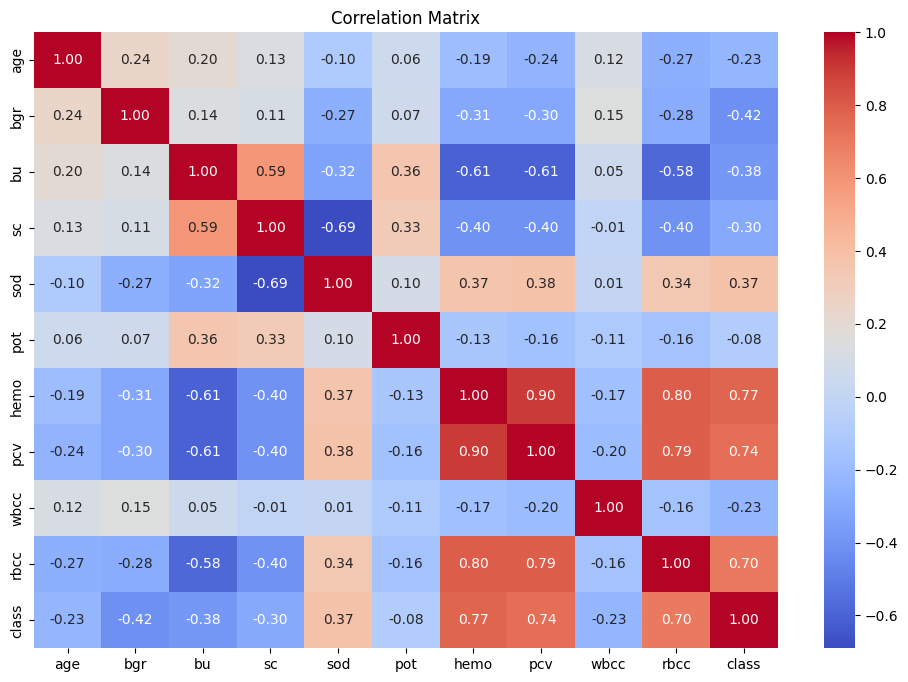

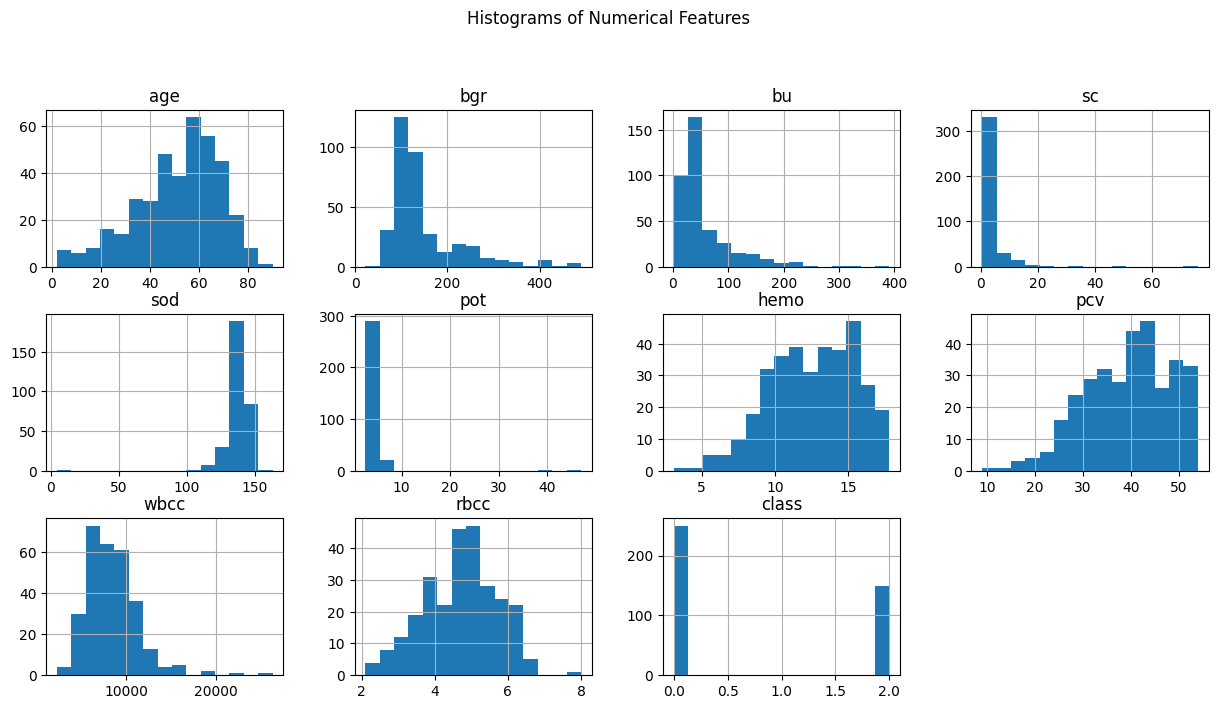

In [ ]:
# CORRELATION MATRIX AND HISTOGRAMS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'chronic_kidney_disease_full.xlsx'
ckd_data = pd.read_excel(file_path)

# Replace '?' with NaN for missing values and convert columns to numeric where applicable
ckd_data.replace('?', np.nan, inplace=True)
for col in ckd_data.columns:
    ckd_data[col] = pd.to_numeric(ckd_data[col], errors='coerce') if ckd_data[col].nunique() > 10 else ckd_data[col]

# Encoding the 'class' column
label_encoder_class = LabelEncoder()
ckd_data['class'] = label_encoder_class.fit_transform(ckd_data['class'].astype(str))

# Dropping rows with missing target variable
ckd_data_cleaned = ckd_data.dropna(subset=['class'])

# Correlation Matrix
corr_matrix_updated = ckd_data_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_updated, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Histograms
numerical_cols_updated = ckd_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
ckd_data_cleaned[numerical_cols_updated].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Histograms of Numerical Features")
plt.show()

